In [37]:
import pandas as pd

df = pd.read_csv('df_gpt4.csv')

df = df.dropna(subset=['cleaned text'])

df = df[df["Main panel_x"] == "A"]

df

,Institution name,Main panel_x,Unit of assessment number_x,Unit of assessment name,Title,Summary impact type,Countries,Formal partners,Funding programmes,Global research identifiers,...,1. Summary of the impact,2. Underpinning research,3. References to the research,4. Details of the impact,5. Sources to corroborate the impact,Weighted Avg,Variance,5 Class Labels,9 Class Labels,cleaned text
1,University of Lincoln,A,6.0,"Agriculture, Food and Veterinary Sciences",Agricultural Robotics: Data Driven Technologie...,Technological,[England];[Norway];[USA],[SAGA Robotics];[Garford Farms Limited];[Berry...,[N/A],[grid.423443.6];[grid.418100.c],...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,3.000,0.666000,3,6,UoL’s innovative agri-food research has underp...
2,University of Cambridge,A,4.0,"Psychology, Psychiatry and Neuroscience",Alleviating the societal and economic burden o...,Health,[England];[China];[USA];[Canada];[Belgium];[Fr...,NaN,NaN,[grid.14105.31];[grid.473755.7];[grid.52788.30],...,**1. Summary of the impact** \(indicative maxi...,**2. Underpinning research \(indicative maximu...,**3. References to the research** \(indicative...,**4. Details of the impact** \(indicative maxi...,**5. Sources to corroborate the impact** \(ind...,3.667,0.444111,4,7,The Cambridge University research has had a si...
3,University of Cambridge,A,6.0,"Agriculture, Food and Veterinary Sciences",Changes in policy for the control of bovine tu...,Environmental,[England];[Wales];[Ethiopia],NaN,NaN,[grid.418100.c];[grid.434257.3];[grid.433527.4...,...,### 1. Summary of the impact \(indicative max...,### 2. Underpinning research \(indicative max...,### 3. References to the research \(indicativ...,### 4. Details of the impact \(indicative max...,### 5. Sources to corroborate the impact \(in...,3.500,0.450000,4,7,Bovine tuberculosis is a substantial economic ...
7,University of Cambridge,A,2.0,"Public Health, Health Services and Primary Care",Empowering personalised discussion and advance...,Health,[England];[Scotland],NaN,NaN,[grid.451056.3],...,**1. Summary of the impact** \(indicative maxi...,**2. Underpinning research** \(indicative maxi...,**3. References to the research** \(indicative...,**4. Details of the impact** \(indicative maxi...,**5. Sources to corroborate the impact** \(ind...,3.626,0.358124,4,7,Advance decisions about resuscitation are a gl...
17,"University of Nottingham, The",A,5.0,Biological Sciences,Improving patient outcomes and treatment guide...,Health,[UNITED KINGDOM],[ABBVIE LTD];[Bristol Myers Squibb Internation...,[Investigator Sponsored Award];[Research Grant...,[14105.31];[57981.32],...,**1. Summary of the impact** \n\n Pioneering r...,**2. Underpinning research** \n\n The World He...,**3. References to the research** \n\n **Key p...,**4. Details of the impact** \n\n Professor Ir...,**5. Sources to corroborate the impact** \(web...,3.214,0.454204,3,6,Professor Irving's research has been instrumen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,University College London,A,4.0,"Psychology, Psychiatry and Neuroscience",Transforming the use of Arterial Spin Labellin...,Technological,NaN,NaN,[COST Action];[SBRI (Phase I)];[SBRI (Phase II...,[grid.450763.3];[grid.453295.c];[grid.14105.31],...,**1. Summary of the impact** \n\n Arterial Spi...,**2. Underpinning research** \n\n Arterial Spi...,**3. References to the research** \n\n1. Pali...,**4. Details of the impact** \n\n The Arterial...,**5. Sources to corroborate the impact** \n\n1...,3.644,0.655264,4,7,The Arterial Spin Labelling In Dementia (AID) ...
6271,Royal Holloway and Bedford New College,A,5.0,Biological Sciences,Transforming therapeutic outcomes of fatal Duc...,Health,[United Kingdom];[France];[Belgium];[Italy],[UCL Elizabeth G

In [38]:
def map_labels(label):
    if label in [0, 1, 2, 3, 4, 5]:
        return 0
    elif label in [6, 7]:
        return 1
    elif label == 8:
        return 2
    else:
        return label
    
df['3 Class Labels'] = df['9 Class Labels'].apply(map_labels)


Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.13      0.16      0.14        43
           1       0.65      0.64      0.65       264
           2       0.28      0.26      0.27        98

    accuracy                           0.50       405
   macro avg       0.35      0.35      0.35       405
weighted avg       0.50      0.50      0.50       405



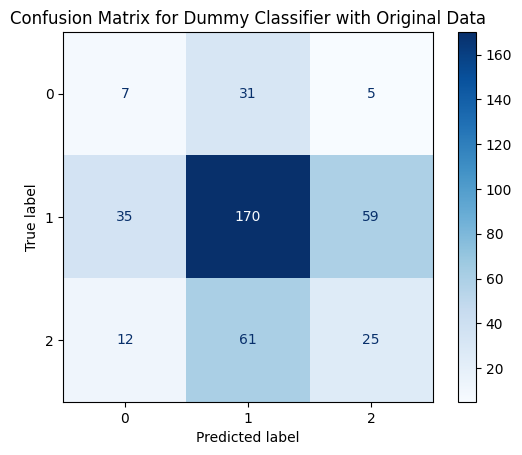

In [43]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df["cleaned text"]

y = df["3 Class Labels"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

dummy_clf.fit(X_train, y_train)

y_pred_test = dummy_clf.predict(X_test)

print("Test Data Evaluation:")
print(classification_report(y_test, y_pred_test))

cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=dummy_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Dummy Classifier with Original Data')
plt.show()